In [1]:
%matplotlib notebook

import cv2
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


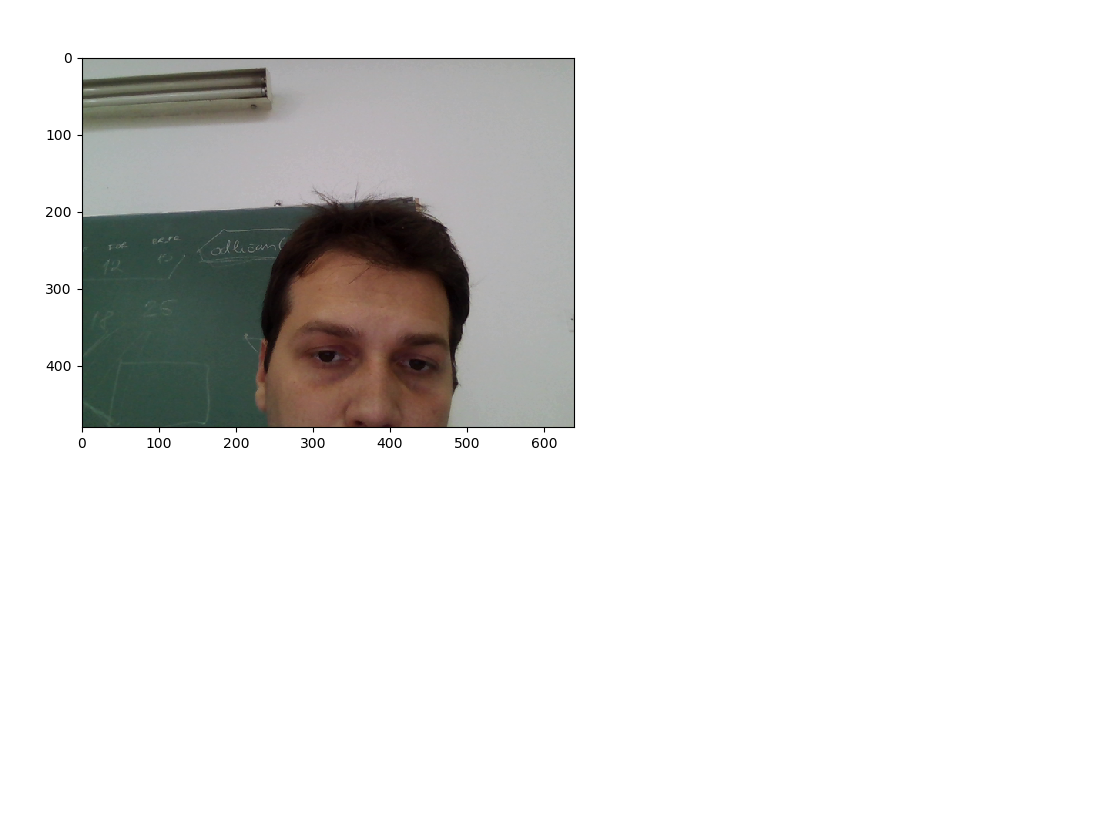

C:\Users\Daniel\Anaconda3\lib\site-packages\matplotlib\backend_bases.py:2445: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


In [ ]:
vc = cv2.VideoCapture(0)
vc.open(0)
plt.ion()
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

if vc.isOpened():
    stvoren, slika = vc.read()
    slika = cv2.cvtColor(slika, cv2.COLOR_BGR2RGB)
    kamera = plt.imshow(slika)
else:
    stvoren = False
    
while stvoren:
    try:
        stvoren, slika = vc.read()
        slika = cv2.cvtColor (slika, cv2.COLOR_BGR2RGB)
        
        #Ovdje ide programski kod
        siva_slika = cv2.cvtColor (slika, cv2.COLOR_BGR2GRAY)

        ljudi = hog.detectMultiScale (siva_slika,winStride=(8,8), padding=(16,16), scale=1.05, useMeanshiftGrouping=0)
        if len (ljudi[0]) > 0:
            for (x,y,w,h) in ljudi[0]:
                cv2.rectangle(slika, (x,y), (x+w, y+h), (255,0,0), 2)
        kamera.set_data(slika)
        plt.draw()
        
        try:
            plt.pause(0.05)
        except Exception:
            pass
    except KeyboardInterrupt:
        vc.release()